In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle/

In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:05<00:00, 21.9MB/s]
100% 428M/428M [00:05<00:00, 87.5MB/s]


In [5]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

Import libraries

In [6]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [7]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if len(paths)==2800:
    break
print('Dataset is loaded')

Dataset is loaded


In [8]:
len(paths)

2800

In [9]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_cool_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_mode_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_bar_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_thought_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav']

In [10]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [11]:
#create a dataframe
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear


In [12]:
df['label'].value_counts()

,count
label,
fear,400
happy,400
neutral,400
sad,400
disgust,400
angry,400
ps,400


In [13]:
df['label_count']=df['label'].value_counts()

In [14]:
df.drop('label_count', axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear
...,...,...
2795,/content/tess toronto emotional speech set dat...,neutral
2796,/content/tess toronto emotional speech set dat...,neutral
2797,/content/tess toronto emotional speech set dat...,neutral
2798,/content/tess toronto emotional speech set dat...,neutral


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

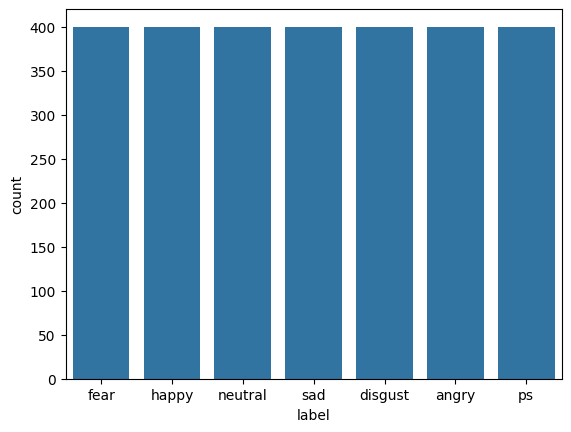

In [16]:
sns.countplot(data=df,x='label')

In [17]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [18]:
df.drop('label_count', axis=1, inplace = True)

In [19]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...  fear
1  /content/tess toronto emotional speech set dat...  fear
2  /content/tess toronto emotional speech set dat...  fear
3  /content/tess toronto emotional speech set dat...  fear
4  /content/tess toronto emotional speech set dat...  fear
['fear' 'happy' 'neutral' 'sad' 'disgust' 'angry' 'ps']


In [20]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_cool_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_mode_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_bar_fear.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_red_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_search_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_size_neutral.wav'],
      dtype=object)

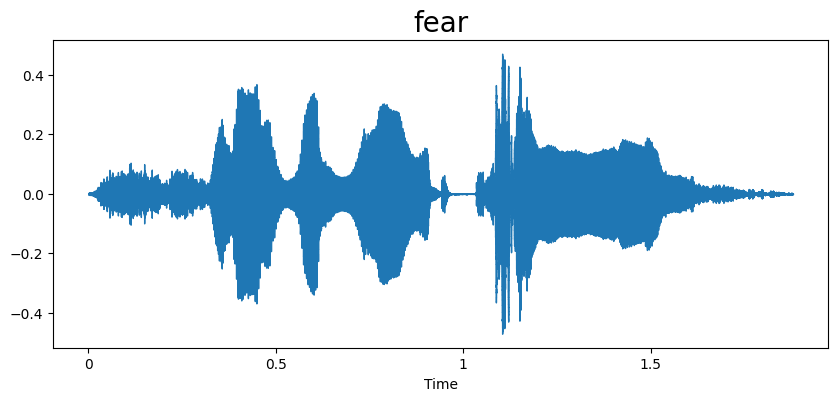

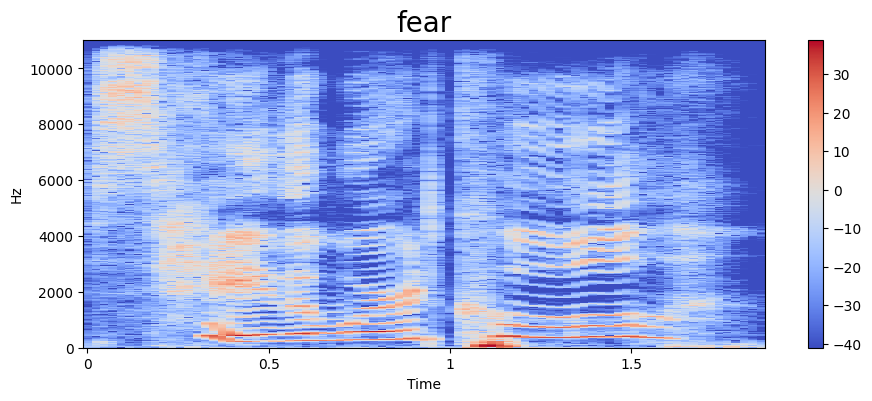

In [21]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

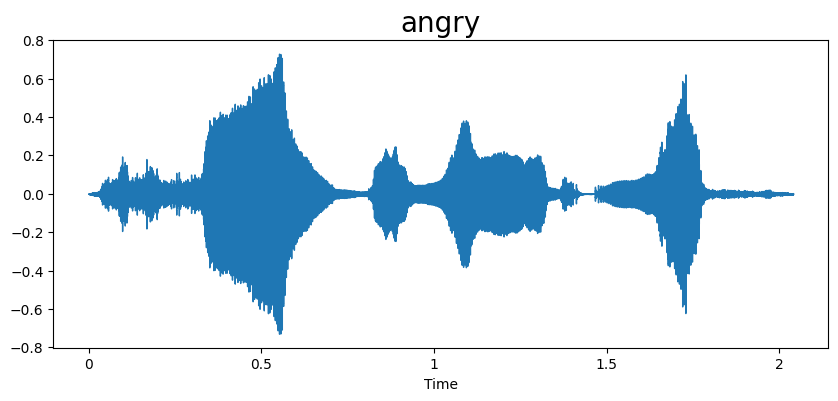

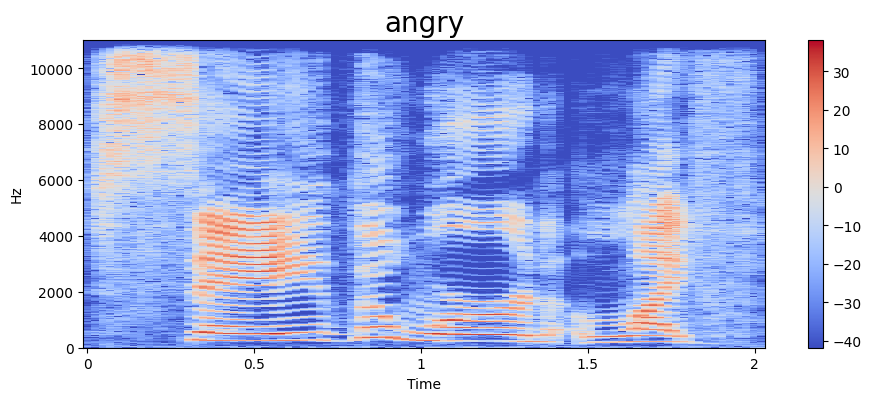

In [22]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

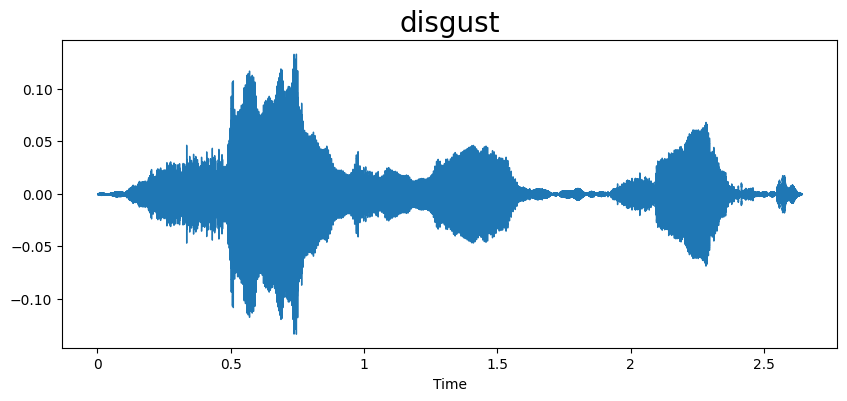

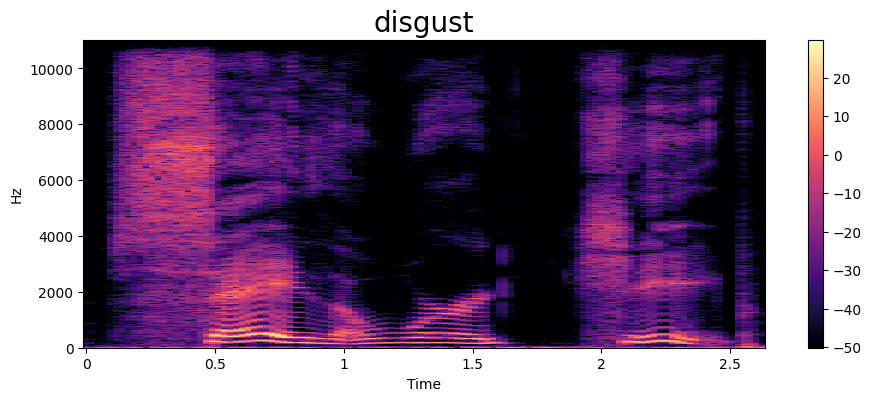

In [23]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

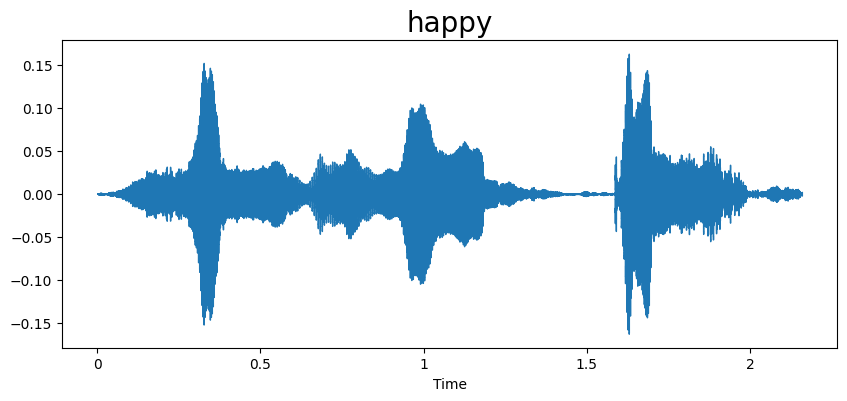

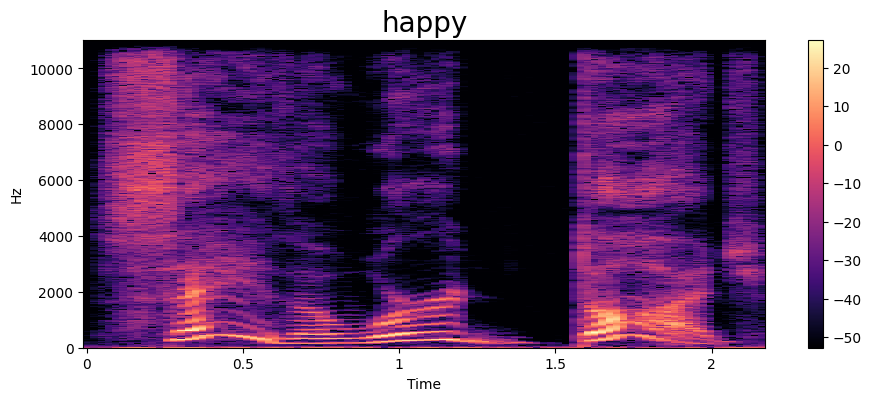

In [24]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

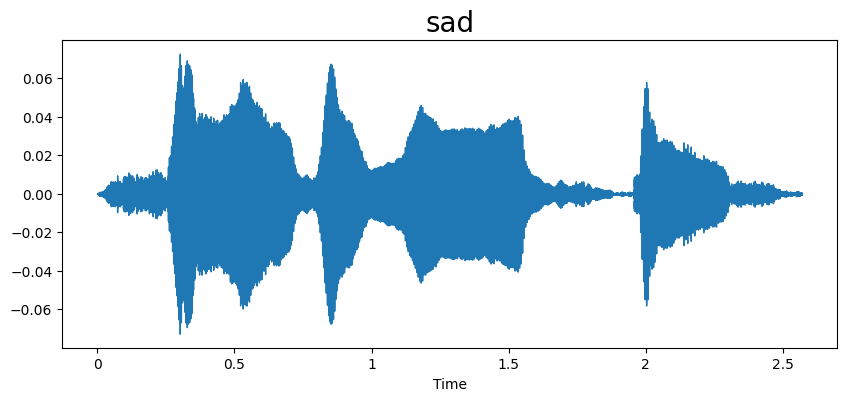

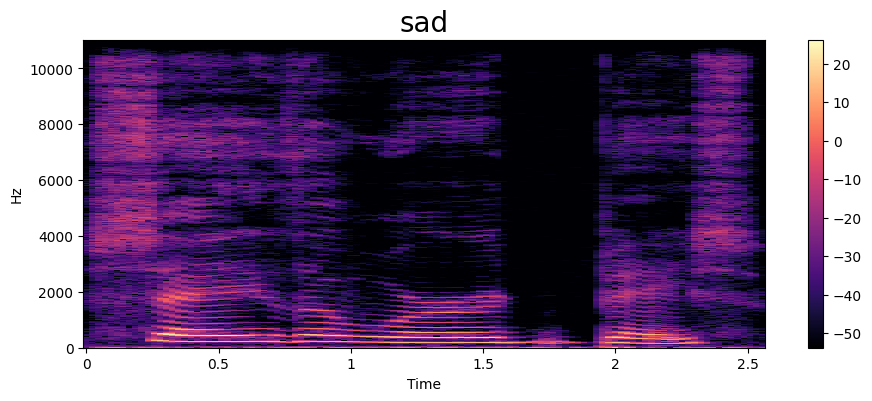

In [25]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

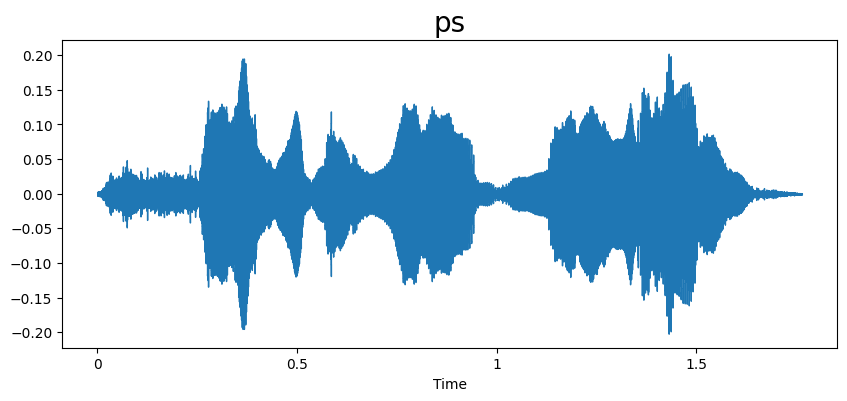

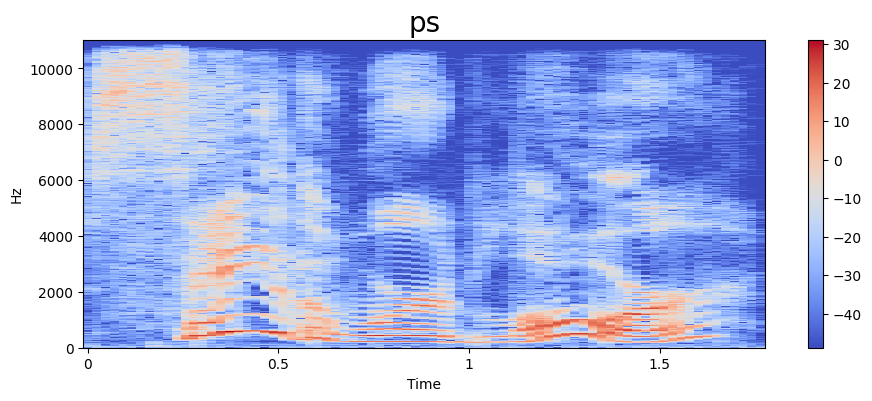

In [26]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

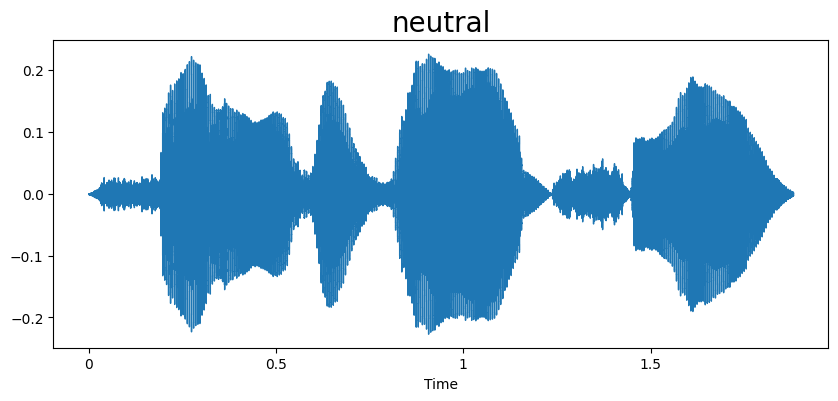

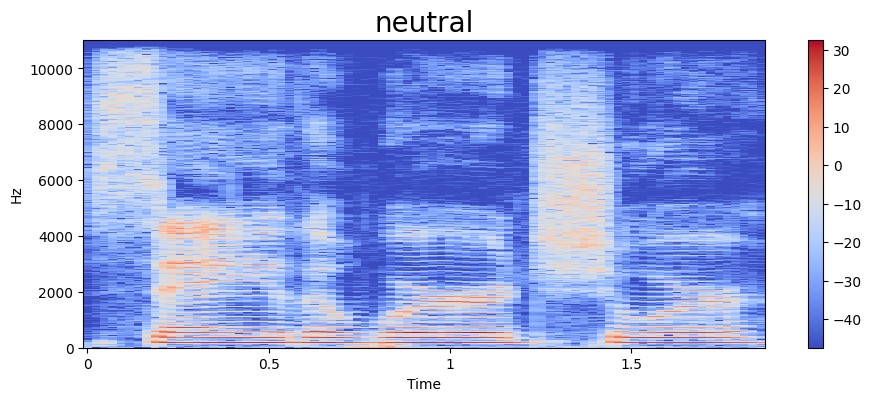

In [27]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [28]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [29]:
extract_mfcc(df['speech'][0])

array([-3.0557169e+02,  6.1348885e+01, -3.5935605e+00,  9.5702257e+00,
       -2.0758003e+01,  8.4735699e+00,  7.7619414e+00, -3.8150115e+00,
       -1.6197077e+01,  1.0904133e+01, -1.4916014e+01,  3.3636060e-01,
        4.7368747e-01, -2.0347536e+00,  4.6492200e+00,  6.0863614e+00,
       -4.2011938e+00,  2.0267199e+01,  3.9445598e+00,  7.2158480e+00,
        5.6329975e+00, -7.1318593e+00, -5.0318079e+00,  8.8794794e+00,
        1.0908496e-01,  1.4982407e+01, -3.4800723e+00,  2.3000336e+00,
        5.0852866e+00,  2.4977047e+00, -7.3206301e+00, -2.8949924e+00,
       -9.4217043e+00,  5.0911269e+00,  2.7864394e+00,  3.3840773e+00,
        5.5092854e+00,  2.3266747e+00,  4.2027065e-01, -9.0322268e-01],
      dtype=float32)

In [30]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [31]:
X_mfcc

,speech
0,"[-305.5717, 61.348885, -3.5935605, 9.570226, -..."
1,"[-300.38443, 76.44886, -17.584229, 9.900515, -..."
2,"[-292.65207, 66.65692, -33.22581, -11.983398, ..."
3,"[-350.75323, 40.11904, -17.199163, 3.240081, -..."
4,"[-285.99304, 34.169857, -12.507183, 41.868214,..."
...,...
2795,"[-515.8311, 85.74506, 20.915037, 1.2727559, 15..."
2796,"[-521.37775, 119.37767, 28.279575, -7.623913, ..."
2797,"[-550.77277, 114.73252, 31.275137, 2.1112971, ..."
2798,"[-499.69968, 69.37665, 22.5701, 1.9734275, 13...."


In [32]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [33]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [35]:
y=y.toarray()

In [36]:
y.shape

(2800, 7)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

Create a LSTM model

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Train the model
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2478 - loss: 1.8193 - val_accuracy: 0.6554 - val_loss: 1.0931
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5415 - loss: 1.1535 - val_accuracy: 0.8036 - val_loss: 0.5737
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7013 - loss: 0.7757 - val_accuracy: 0.8982 - val_loss: 0.2786
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8243 - loss: 0.4992 - val_accuracy: 0.8643 - val_loss: 0.3719
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8707 - loss: 0.4637 - val_accuracy: 0.9393 - val_loss: 0.1889
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8968 - loss: 0.3630 - val_accuracy: 0.9464 - val_loss: 0.1843
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9246 - loss: 0.2760 - val_accuracy: 0.9357 - val_loss: 0.2407
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9087 - loss: 0.3101 - val_accuracy: 0.9607 - val_los

Visualize the Results

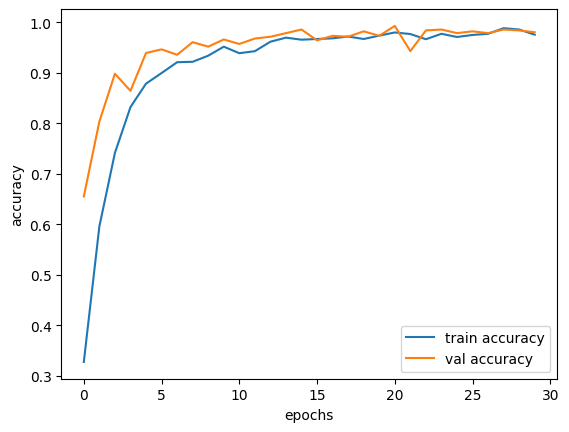

In [40]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

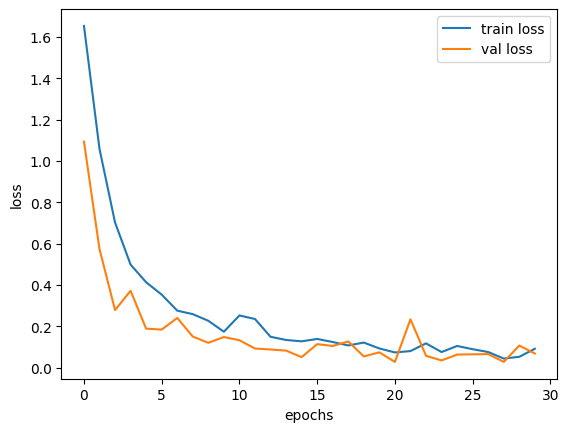

In [41]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [42]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

In [45]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[87  0  0  1  0  0  1]
 [ 0 79  0  1  0  4  3]
 [ 0  0 74  0  0  0  0]
 [ 0  0  0 91  0  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  1  0 75  0]
 [ 0  0  0  0  0  0 73]]


Thank You